
🔍 Custom Threshold = 0.4
              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1033
           1       0.44      0.79      0.57       374

    accuracy                           0.68      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.77      0.68      0.70      1407



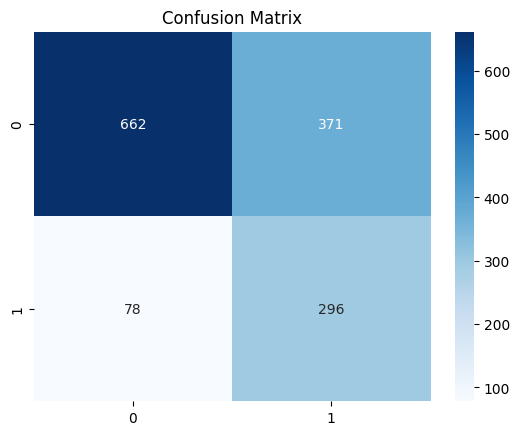

Used features: ['gender', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges', 'SeniorCitizen', 'InternetService', 'PaymentMethod']


In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 📊 Load and clean data
df = pd.read_csv('../data/churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop(columns=['customerID'], inplace=True)

# 🧠 Select Features
selected_features = [
    'gender', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges',
    'SeniorCitizen', 'InternetService', 'PaymentMethod', 'Churn'
]
df = df[selected_features]

# 🔤 Encode categorical features
categorical_cols = ['gender', 'StreamingTV', 'StreamingMovies', 'Contract', 'InternetService', 'PaymentMethod']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 🎯 Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 🧪 Train-Test Split
X = df.drop('Churn', axis=1)
y = df['Churn']

# Check and drop NaNs in y
if y.isnull().sum() > 0:
    nan_idx = y[y.isnull()].index
    X = X.drop(nan_idx)
    y = y.drop(nan_idx)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧼 Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ⚖️ SMOTE Class Balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 🚀 Train XGBoost Model
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_resampled, y_resampled)

# 📈 Predict Probabilities for Thresholding
y_probs = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.4  # Custom decision threshold
y_pred = (y_probs >= threshold).astype(int)

# 🧾 Evaluation
print(f"\n🔍 Custom Threshold = {threshold}")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 💾 Save model and scaler
os.makedirs('../model', exist_ok=True)
joblib.dump(model, '../model/churn_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')

# 🧠 Feature Confirmation
print("Used features:", X.columns.tolist())


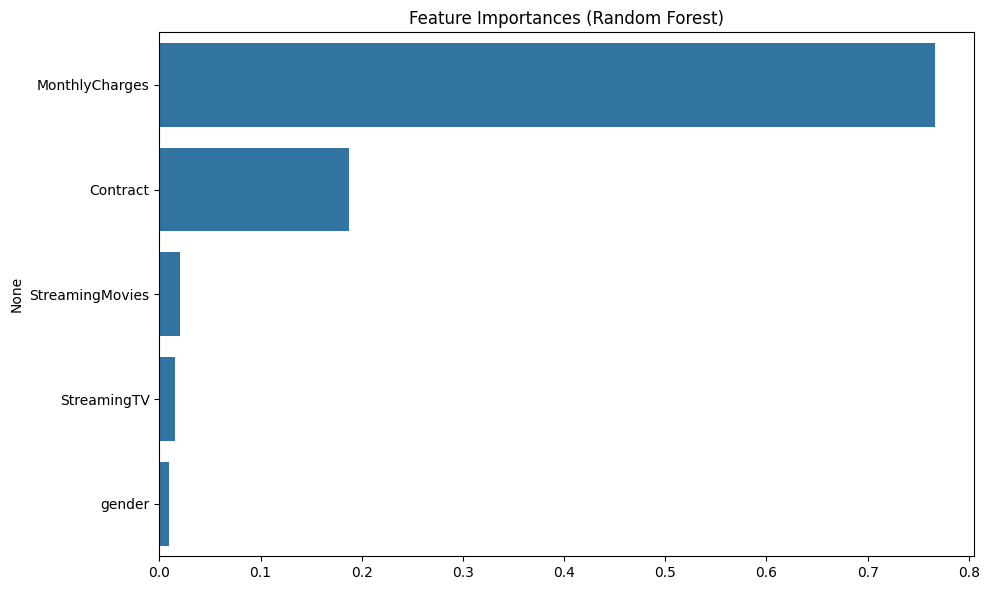

In [3]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [4]:
import joblib
joblib.dump(model, 'churn_model.pkl')



['churn_model.pkl']

In [6]:
import joblib

# Save model and scaler
joblib.dump(model, '../model/churn_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')



['../model/scaler.pkl']